# Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
X = dataset[['Open','High', 'Low']]
Y = dataset['Adj Close']

In [4]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [6]:
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.9974681612587162
test score:  0.9975726361411653
number of features used:  1


In [7]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01:", test_score001)
print("number of features used: for alpha = 0.01:", coeff_used001)

training score for alpha=0.01: 0.9993706133400125
test score for alpha =0.01: 0.9991932689568274
number of features used: for alpha = 0.01: 2


In [8]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001:", test_score00001)
print("number of features used: for alpha = 0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.999552234705388
test score for alpha =0.0001: 0.9995505453433388
number of features used: for alpha = 0.0001: 3


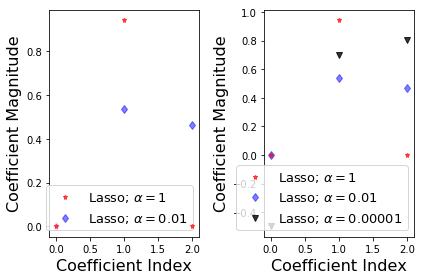

In [9]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Stock Lasso Regression

In [13]:
X = dataset[['Open','High', 'Low']]
Y = dataset['Adj Close']

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

lasso = Lasso()
lasso = lasso.fit(X_train,Y_train)

In [16]:
Y_pred = lasso.predict(X_test)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(937, 3)
(937,)
(235, 3)
(235,)


In [18]:
lasso.score(X_train, Y_train)

0.9973732506090865

In [19]:
lasso.score(X_test, Y_test)

0.9969392393078691

In [21]:
lasso.coef_

array([0.        , 0.93948345, 0.        ])

In [22]:
lasso.intercept_

0.286974264398304

In [24]:
from sklearn.metrics import r2_score

y_pred_lasso = lasso.fit(X_train, Y_train).predict(X_test)
r2_score_lasso = r2_score(Y_test, y_pred_lasso)

print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.996939


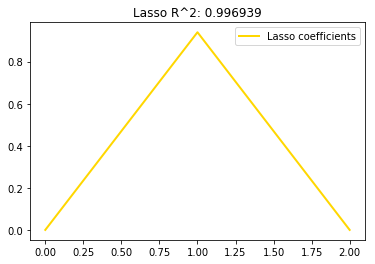

In [27]:
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f" % (r2_score_lasso))
plt.show()